In [34]:
import numpy as np
import matplotlib.pyplot as plt

In [35]:
layer_dims = [3,3,1]
X = np.array([[1,1,1],[1,1,-1],[1,-1,1],[1,-1,-1],[-1,1,1],[-1,1,-1],[-1,-1,1],[-1,-1,-1]])
Y = np.array([1,1,1,1,1,1,1,-1])

In [36]:
def init_weight(layer_dims):
    parameters = {}
    for i in range(1,len(layer_dims)):
        parameters['W'+str(i)] = np.random.randn(layer_dims[i],layer_dims[i-1])*(np.sqrt(2/layer_dims[i-1]))
        parameters['b'+str(i)] = np.zeros([layer_dims[i],1])
    return parameters
parameters = init_weight(layer_dims)

def sigmoid(X):
    return 1/(1+np.exp(-X))

def forward(X,parameters):
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    
    z1 = np.dot(W1,X.T) + b1
    a1 = sigmoid(z1)
    
    z2 = np.dot(W2,a1) + b2
    a2 = sigmoid(z2)
    
    cache = (z1,a1,z2,a2)
    return cache,a2

def backprop(parameters,cache,Y,X):
    (z1,a1,z2,a2)  = cache
    
    da2 = (1/Y.shape[0])*(a2 - Y)
    dz2 = da2*sigmoid(z2)*(1-sigmoid(z2))
    dw2 = np.dot(dz2,a1.T)
    db2 = np.sum(dz2, axis=1, keepdims = True)
    
    da1 = np.dot(dw2.T,dz2)
    dz1 = da1*sigmoid(z1)*(1-sigmoid(z1))
    dw1 = np.dot(dz1,X)
    db1 = np.sum(dz1,axis = 1, keepdims = True)
    
    grads = {'dz2':dz2,'dw2':dw2,'db2':db2,'da1':da1,'dz1':dz1,'dw1':dw1,'db1':db1}
    return grads

def update(parameters,grads,learning_rate):
    parameters["W2"] = parameters["W2"] - learning_rate * grads["dw2"]
    parameters["b2"] = parameters["b2"] - learning_rate * grads["db2"]
    parameters["W1"] = parameters["W1"] - learning_rate * grads["dw1"]
    parameters["b1"] = parameters["b1"] - learning_rate * grads["db1"]
    return parameters

def cost(a2,Y):
    error = (1/(2*Y.shape[0]))*np.sum(np.power((Y - a2),2))
    return error

def predict(X,parameters):
    cache,a2 = forward(X,parameters)
    a2 = (a2 >= 0.5).astype(int)
    for i in range(0,a2.shape[1]):
        if a2[0,i] == 0:
            a2[0,i] = -1
    return a2
                                        

    
        

In [45]:
def train(X,Y,layer_dims,learning_rate):
    costn = []
    parameters = init_weight(layer_dims)
    print("W1 :",parameters['W1'],"\n\n")
    print("b1 :",parameters['b1'],"\n\n")
    print("W2 : ",parameters['W2'],"\n\n")
    print("b2 : ",parameters['b2'],"\n\n")
    for i in range(0,2):
        print("====================EPOCH",str(i),"=====================\n")
        cache,a2 = forward(X,parameters)
        costn.append((cost(a2,Y)))
        grads = backprop(parameters,cache,Y,X)
        parameters = update(parameters,grads,learning_rate)
        print("Z1 : ",cache[0],"\n\n")
        print("A1 : ",cache[1],"\n\n")
        print("Z2 : ",cache[2],"\n\n")
        print("A2 : ",cache[3],"\n\n")
        print("Cost: ",costn[i],"\n\n")
        print("dz2 : ",grads["dz2"],"\n\n")
        print("dw2 : ",grads["dw2"],"\n\n")
        print("db2 : ",grads["db2"],"\n\n")
        print("dz1 : ",grads["dz1"],"\n\n")
        print("dw1 : ",grads["dw1"],"\n\n")
        print("db1 : ",grads["db1"],"\n\n")
        print("Updated weights:\n\n\n")
        print("W1 :",parameters['W1'],"\n\n")
        print("b1 :",parameters['b1'],"\n\n")
        print("W2 : ",parameters['W2'],"\n\n")
        print("b2 : ",parameters['b2'],"\n\n")
    return costn,parameters
    
    
    

In [46]:
costn,parameters = train(X,Y,layer_dims,0.5)

W1 : [[ 1.98787633  0.30076968 -0.93947578]
 [-0.40029695  0.48976916  0.7625096 ]
 [ 0.85346948 -0.29312239 -0.50600827]] 


b1 : [[0.]
 [0.]
 [0.]] 


W2 :  [[0.46651709 0.56841851 0.8271543 ]] 


b2 :  [[0.]] 


====================EPOCH 0 =====================

Z1 :  [[ 1.34917022  3.22812179  0.74763086  2.62658243 -2.62658243 -0.74763086
  -3.22812179 -1.34917022]
 [ 0.8519818  -0.67303739 -0.12755651 -1.6525757   1.6525757   0.12755651
   0.67303739 -0.8519818 ]
 [ 0.05433881  1.06635536  0.6405836   1.65260014 -1.65260014 -0.6405836
  -1.06635536 -0.05433881]] 


A1 :  [[0.79399394 0.96187894 0.67866226 0.93255291 0.06744709 0.32133774
  0.03812106 0.20600606]
 [0.70098271 0.33781705 0.46815404 0.16076114 0.83923886 0.53184596
  0.66218295 0.29901729]
 [0.51358136 0.74390319 0.65488537 0.83924216 0.16075784 0.34511463
  0.25609681 0.48641864]] 


Z2 :  [[1.19367432 1.25607716 1.12440622 1.22061424 0.64147566 0.73768369
  0.60601275 0.66841558]] 


A2 :  [[0.76739757 0.77835007 

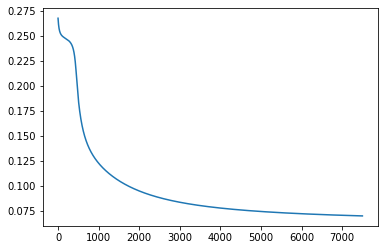

In [30]:
plt.plot(np.linspace(1,7500,7500),costn)

In [31]:
costn[-1]

0.07016272484447673

In [32]:
accuracy = (np.sum(1*(Y == predict(X,parameters)))/8)*100
print(accuracy)

100.0
